<a href="https://colab.research.google.com/github/bdrinconp/ml_stats_classes/blob/main/code_samples/clase2_application_default_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Este estudio de caso tiene como objetivo darnos una idea de cómo aplicar el Análisis Exploratorio de Datos (EDA) en un escenario empresarial real.

***Descripción de columnas:***

https://docs.google.com/spreadsheets/d/15DzF_ZWN0LyMg-nL7dqZnyrqjcfQhrljY7uauR3VuC0/edit?usp=sharing



# Importar datos y librerias

In [ ]:
# librerias
# ==============================================================
import pandas as pd # manipulación de datos
import numpy as np # operaciones matematicas
import matplotlib.pyplot as plt # visualización
import seaborn as sns # visualización

In [ ]:
# Importar datos desde drive
# ==============================================================
from google.colab import drive
drive.mount('/content/drive')


app = pd.read_csv('/content/drive/My Drive/datos_puj/application_data.csv')
prev_app = pd.read_csv('/content/drive/My Drive/datos_puj/previous_application.csv')

# Importar los datos como carga desde colab
# ==============================================================
#app = pd.read_csv('application_data.csv')
#prev_app = pd.read_csv('previous_application.csv')

Mounted at /content/drive


In [ ]:
# Visulizar primeros datos del dataset "app"
# ==============================================================
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Visulizar primeros datos del dataset "prev_app"
# ==============================================================
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Selección de variables (columnas)

In [ ]:
# Visulizar los nombres de las columnas
# ==============================================================
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Visulizar la dimensión del dataframe app (filas, columnas)
# ==============================================================
app.shape

(307511, 122)

In [ ]:
# Resumen de valores faltantes, donde el porcentaje de valores faltantes es mayor a 40%
# ==============================================================
msng_info = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns = {'index':'columna',0:'obs_faltantes'}, inplace = True)
msng_info['%obs_faltantes'] = msng_info['obs_faltantes']/app.shape[0]*100
msng_info.sort_values('obs_faltantes', ascending= False)
msng_info[msng_info['%obs_faltantes']>=40].head(10)

,columna,obs_faltantes,%obs_faltantes
73,EMERGENCYSTATE_MODE,145755,47.398304
74,TOTALAREA_MODE,148431,48.268517
75,YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
76,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
77,YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
78,FLOORSMAX_AVG,153020,49.760822
79,FLOORSMAX_MEDI,153020,49.760822
80,FLOORSMAX_MODE,153020,49.760822
81,HOUSETYPE_MODE,154297,50.176091
82,LIVINGAREA_AVG,154350,50.193326


In [ ]:
# Remover las columnas cuyo % de valores faltantes es superior a 40%
# ==============================================================
msng_col = msng_info[msng_info['%obs_faltantes']>=40]['columna'].to_list()
app_msng_rmvd = app.drop(labels = msng_col, axis = 1)
app_msng_rmvd.shape

(307511, 73)

In [ ]:
# Identificamos las columnas flag (ver descripción de las columnas flag)
# ==============================================================
flag_cols = []

for col in app_msng_rmvd.columns:
  if col.startswith("FLAG_"):
    flag_cols.append(col)

print("Número de columnas que empiezan con flag: ", len(flag_cols))

Número de columnas que empiezan con flag:  28


In [ ]:
# Construimos un dataframe unicamente con las columnas flag y target
# ==============================================================
flag_tgt_col = app_msng_rmvd[flag_cols + ['TARGET']]
flag_tgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


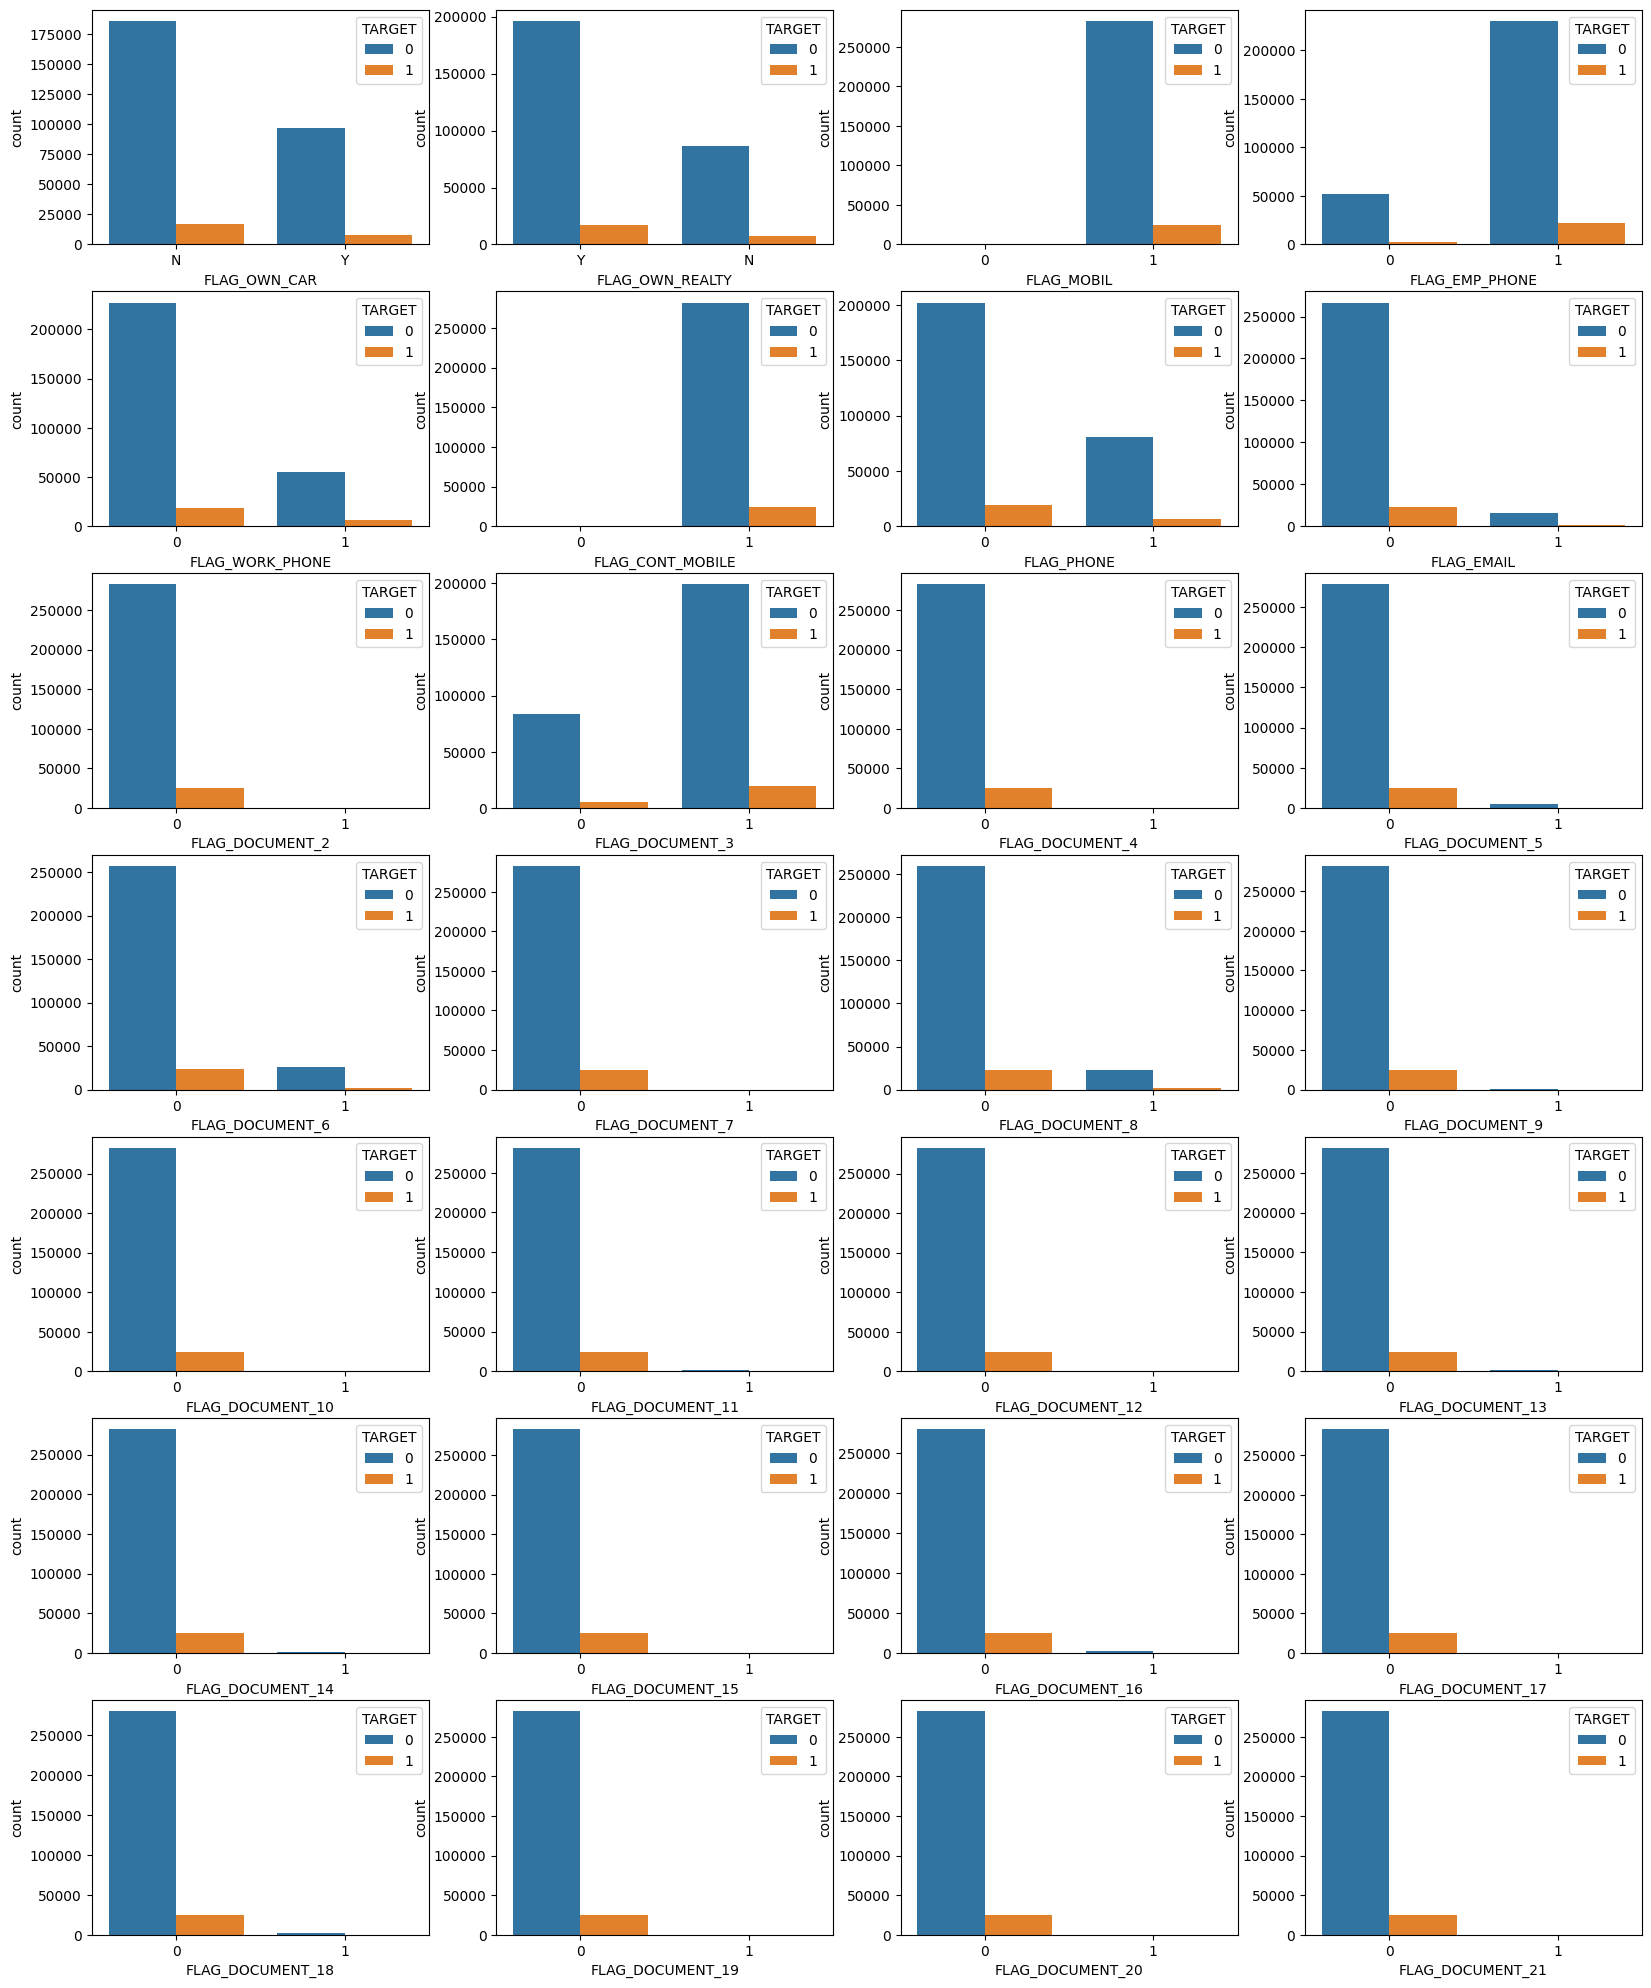

In [ ]:
# Visualizamos la relación entre las columnas flag y target
# ==============================================================
plt.figure(figsize=(20,25))

for i, col in enumerate(flag_cols):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')


In [ ]:
# Creamos un dataframe con algunas variables de interes
#para verificar la correlación con la variable target
# ==============================================================
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
     'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flag_corr_df = app_msng_rmvd[flg_corr]

In [ ]:
# Recodificamos las flags que tienen comportamiento N, Y
# ==============================================================
flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

<ipython-input-13-5c151b6c1d51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
<ipython-input-13-5c151b6c1d51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


In [ ]:
# Revisamos la correlación de las variables de interes
# ==============================================================
flg_corr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']
flag_corr_df = app_msng_rmvd[flg_corr]

<ipython-input-15-231a766cc120>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = round(flag_corr_df.corr(),2)


<Axes: >

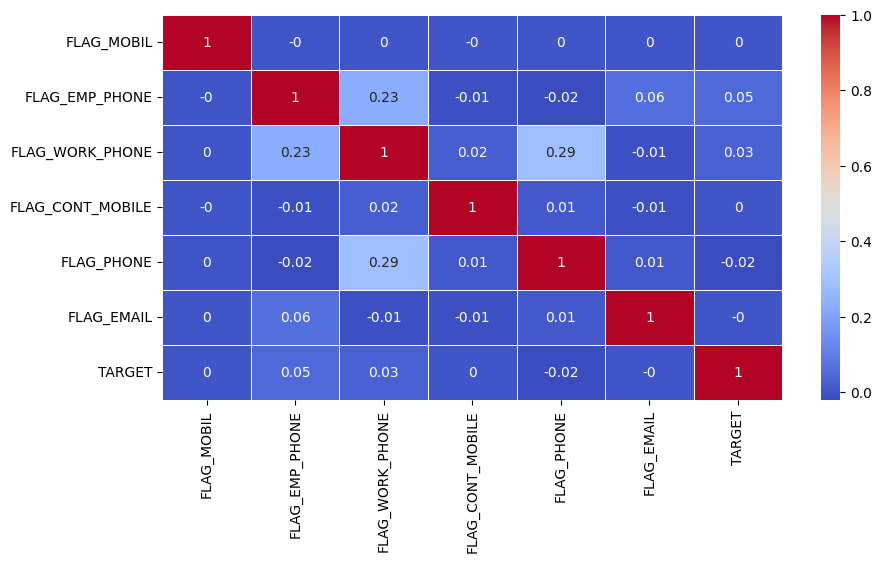

In [ ]:
# Revisamos la correlación de las variables de interes (recordar que la correlación es una medida de similitud entre pares de variables)
# ==============================================================
corr_df = round(flag_corr_df.corr(),2)
plt.figure(figsize = (10,5))
sns.heatmap(corr_df, cmap = 'coolwarm', linewidths = .5, annot = True)

In [ ]:
# En realidad en el analisis de default no se necesitan las columnas flag,
#por lo tanto, removemos las flags
# ==============================================================
app_flag_rmvd = app_msng_rmvd.drop(labels = flag_cols, axis = 1)
app_flag_rmvd.shape

(307511, 45)

<Axes: >

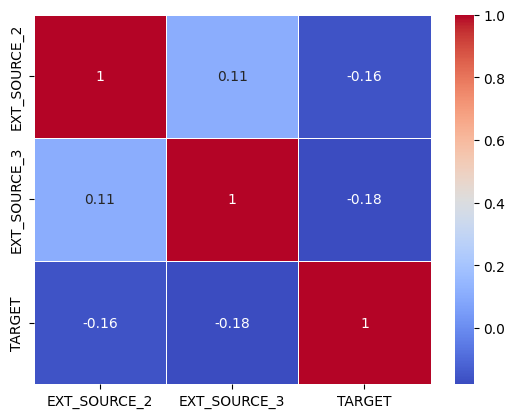

In [ ]:
# Revisamos la correlación contras columnas de interes
# ==============================================================
sns.heatmap(data = round(app_flag_rmvd[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2),
            cmap = 'coolwarm', linewidths = .5, annot = True)

In [ ]:
# Removemos las columnas 'EXT_SOURCE_2', 'EXT_SOURCE_3'
# y finalmente tenemos un dataframe con las columnas a utilizar
# ==============================================================
app_score_col_rmvd = app_flag_rmvd.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis = 1)
app_score_col_rmvd.shape

(307511, 43)

# Featuring engineering

En el análisis de datos, a veces nos encontramos con información incompleta o faltante. Para solucionar esto en este caso hacemos uso de la media, la mediana y la moda para llenar estos datos vacíos. Existen otras alternativas para atacar este problema:

https://cesarquezadab.com/2021/09/19/guia-sobre-tecnicas-de-imputacion-de-datos-con-python/

In [ ]:
# Revisamos los datos faltantes en nuestro dataframe
# ==============================================================
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [ ]:
# Llenamos los datos faltantes de la columna 'CNT_FAM_MEMBERS' con 0
# ==============================================================
app_score_col_rmvd['CNT_FAM_MEMBERS'] = app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()[0]))
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [ ]:
# Llenamos los datos faltantes de la columna 'OCCUPATION_TYPE' con la moda
# ==============================================================
app_score_col_rmvd['OCCUPATION_TYPE'] = app_score_col_rmvd['OCCUPATION_TYPE'].fillna((app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]))
print('Moda OCCUPATION_TYPE:',app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0])
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

Moda OCCUPATION_TYPE: Laborers


0

In [ ]:
# Llenamos los datos faltantes de la columna 'NAME_TYPE_SUITE' con la moda
# ==============================================================
app_score_col_rmvd['NAME_TYPE_SUITE'] = app_score_col_rmvd['NAME_TYPE_SUITE'].fillna((app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0]))
print('Moda NAME_TYPE_SUITE:',app_score_col_rmvd['NAME_TYPE_SUITE'].mode()[0])
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

Moda NAME_TYPE_SUITE: Unaccompanied


0

In [ ]:
# Llenamos los datos faltantes de la columna 'AMT_ANNUITY' con la media
# ==============================================================
app_score_col_rmvd['AMT_ANNUITY'] = app_score_col_rmvd['AMT_ANNUITY'].fillna((app_score_col_rmvd['AMT_ANNUITY'].mean()))
print('Media AMT_ANNUITY:',app_score_col_rmvd['AMT_ANNUITY'].mean())
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

Media AMT_ANNUITY: 27108.573909183444


0

In [ ]:
# Llenamos los datos faltantes de las columnas que inician con 'AMT_REQ_CREDIT_BUREAU' con la mediana
# ==============================================================
amt_req_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)


for col in amt_req_col:
    app_score_col_rmvd[col] = app_score_col_rmvd[col].fillna((app_score_col_rmvd[col].median()))
    print('Mediana ', col, ' ', app_score_col_rmvd[col].median())

Mediana  AMT_REQ_CREDIT_BUREAU_HOUR   0.0
Mediana  AMT_REQ_CREDIT_BUREAU_DAY   0.0
Mediana  AMT_REQ_CREDIT_BUREAU_WEEK   0.0
Mediana  AMT_REQ_CREDIT_BUREAU_MON   0.0
Mediana  AMT_REQ_CREDIT_BUREAU_QRT   0.0
Mediana  AMT_REQ_CREDIT_BUREAU_YEAR   1.0


In [ ]:
# Llenamos los datos faltantes de las columna 'AMT_GOODS_PRICE' con la mediana
# ==============================================================
app_score_col_rmvd['AMT_GOODS_PRICE'] = app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE'].median()))
print('Mediana AMT_GOODS_PRICE', app_score_col_rmvd['AMT_GOODS_PRICE'].median())
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

Mediana AMT_GOODS_PRICE 450000.0


0

In [ ]:
app_score_col_rmvd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modificación de valores

In [ ]:
# Identificamos las variables que comienzan por 'DAYS'
# ==============================================================
days_col = []

for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
# ¿Tiene sentido tener valores de edad en días negativos?
# ==============================================================
app_score_col_rmvd['DAYS_BIRTH'][app_score_col_rmvd.DAYS_BIRTH <= 0]

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [ ]:
# Tomamos el valor absoluto de las variables indentificadas con DAYS, para corregir los negativos
# ==============================================================
for col in days_col:
    app_score_col_rmvd[col] = abs(app_score_col_rmvd[col])

#app_score_col_rmvd.head()

In [ ]:
# Visualizamos el número de valores unicos por variable, esto permite intuir la naturaleza de las variables (columnas)
# ==============================================================
app_score_col_rmvd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [ ]:
# Ahora vemos para una variable especifica sus valores unicos
# ==============================================================
app_score_col_rmvd['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

# Detección de outliers y tratamiento

In [ ]:
# Veamos algunas medias de posición para la variable 'AMT_GOODS_PRICE'
# ==============================================================

# Desactiva la notación científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

app_score_col_rmvd['AMT_GOODS_PRICE'].agg({'min': 'min',
                                           'p25:':lambda x: x.quantile(0.25),
                                           'median':'median',
                                           'mean':'mean',
                                           'p75': lambda x: x.quantile(0.75),
                                           'max':'max'})

min        40500.000
p25:      238500.000
median    450000.000
mean      538316.294
p75       679500.000
max      4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

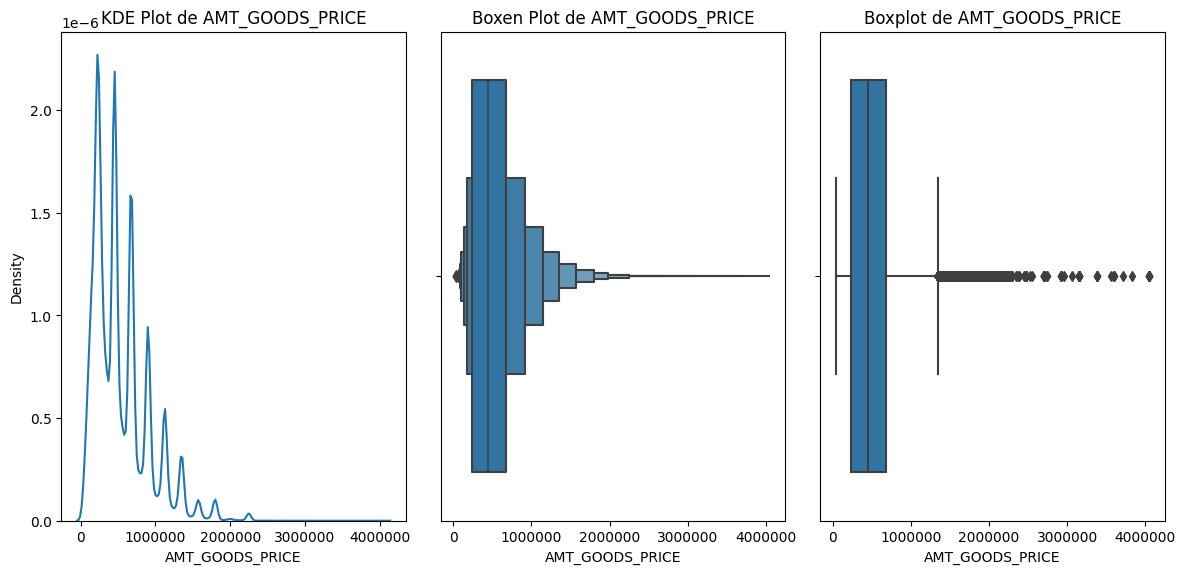

In [ ]:
# Distribución de la variable 'AMT_GOODS_PRICE'
# ==============================================================
def plot_distributions(df, variable):
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))  # 1 fila, 3 columnas

    # Gráfico 1: KDE Plot
    sns.kdeplot(data=df, x=variable, ax=ax[0])
    ax[0].set_title(f'KDE Plot de {variable}')
    ax[0].ticklabel_format(style='plain', axis='x', useOffset=False)

    # Gráfico 2: Boxen Plot
    sns.boxenplot(data=df, x=variable, ax=ax[1])
    ax[1].set_title(f'Boxen Plot de {variable}')
    ax[1].ticklabel_format(style='plain', axis='x', useOffset=False)

    # Gráfico 3: Boxplot
    sns.boxplot(data=df, x=variable, ax=ax[2])
    ax[2].set_title(f'Boxplot de {variable}')
    ax[2].ticklabel_format(style='plain', axis='x', useOffset=False)

    plt.tight_layout()
    plt.show()


plot_distributions(app_score_col_rmvd, 'AMT_GOODS_PRICE')

Los outliers de un boxplot se identificando usando la siguiente regla:

1. Calcular el rango intercuartilico

$$ IQR = Q_3 - Q_1$$

2. Una vez calculado el IQR, se determinan los limites inferior y superior para identificar outliers:

$$ Limite \ inferior = Q_1 - 1.5*IQR$$
$$ Limite \ superior = Q_3 + 1.5*IQR$$

Los datos que caen por dejabo del limite inferior o por encima del limite superior se consideran outliers.

https://www.aprendemachinelearning.com/deteccion-de-outliers-en-python-anomalia/

https://victoryepes.blogs.upv.es/2022/02/21/que-hacemos-con-los-valores-atipicos-outliers/


## Binning

El "binning" o "discretización" es el proceso de convertir variables numéricas continuas en 'bins' o 'cajas' discretas. Esto implica dividir el rango de los datos observados en intervalos, y luego asignar las observaciones a estos intervalos.

El binning puede ser particularmente útil para tratar con "outliers" o valores atípicos por varias razones:

1. Suavización: Al agrupar datos en intervalos, los valores extremos se mezclan con los valores más típicos dentro del mismo bin, lo que suaviza el efecto de los outliers.

2. Mejora de la Interpretación: Los bins facilitan una comprensión más intuitiva de la distribución de los datos, especialmente cuando se trata de grandes conjuntos de datos con valores extremos.

3. Reducción de la Varianza: Los bins pueden actuar como un tipo de regularización, disminuyendo el efecto de pequeñas fluctuaciones en los datos, lo que podría ser especialmente útil en modelos sensibles a outliers.

4. Visualización: El binning facilita la creación de histogramas y otras visualizaciones, lo que puede hacer que los patrones subyacentes en los datos sean más accesibles.

Es esencial elegir el número y tamaño de los bins cuidadosamente, ya que una mala elección puede enmascarar o distorsionar la verdadera estructura subyacente de los datos.

In [ ]:
# Identificamos los deciles asociados a la variable 'AMT_GOODS_PRICE'
# ==============================================================
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.100    180000.000
0.200    225000.000
0.300    270000.000
0.400    378000.000
0.500    450000.000
0.600    522000.000
0.700    675000.000
0.800    814500.000
0.900   1093500.000
0.990   1800000.000
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'AMT_GOODS_PRICE'
# ==============================================================
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [ ]:
# Identificamos los deciles asociados a la variable 'AMT_INCOME_TOTAL'
# ==============================================================
print(app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]))
print('Max:', app_score_col_rmvd['AMT_INCOME_TOTAL'].max())

0.100    81000.000
0.200    99000.000
0.300   112500.000
0.400   135000.000
0.500   147150.000
0.600   162000.000
0.700   180000.000
0.800   225000.000
0.900   270000.000
0.990   472500.000
Name: AMT_INCOME_TOTAL, dtype: float64
Max: 117000000.0


In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'AMT_INCOME_TOTAL'
# ==============================================================
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [ ]:
# Identificamos los deciles asociados a la variable 'AMT_CREDIT'
# ==============================================================
print(app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]))
print('Max AMT_CREDIT: ',app_score_col_rmvd['AMT_CREDIT'].max())

0.100    180000.000
0.200    254700.000
0.300    306306.000
0.400    432000.000
0.500    513531.000
0.600    604152.000
0.700    755190.000
0.800    900000.000
0.900   1133748.000
0.990   1854000.000
Name: AMT_CREDIT, dtype: float64
Max AMT_CREDIT:  4050000.0


In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'AMT_CREDIT'
# ==============================================================
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE'] = pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size()
#app_score_col_rmvd['AMT_CREDIT'].isnull().sum()

AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [ ]:
# Identificamos los deciles asociados a la variable 'AMT_CREDIT'
# ==============================================================
print(app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]))
print('Max AMT_ANNUITY',app_score_col_rmvd['AMT_ANNUITY'].max())

0.100   11074.500
0.200   14701.500
0.300   18189.000
0.400   21870.000
0.500   24903.000
0.600   28062.000
0.700   32004.000
0.800   37516.500
0.900   45954.000
0.990   70006.500
Name: AMT_ANNUITY, dtype: float64
Max AMT_ANNUITY 258025.5


In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'AMT_ANNUITY'
# ==============================================================
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE'] = pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()
#app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

AMT_ANNUITY_RANGE
0-25K         154867
25K-50K       131347
50K-100K       20792
100K-150K        437
150K-200K         32
Above 200K        36
dtype: int64

In [ ]:
# Identificamos los deciles asociados a la variable 'DAYS_EMPLOYED'
# ==============================================================
print(app_score_col_rmvd['DAYS_EMPLOYED'].agg(['min','max','median']))
print(app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99]))

min           0.000
max      365243.000
median     2219.000
Name: DAYS_EMPLOYED, dtype: float64
0.100      392.000
0.200      749.000
0.300     1132.000
0.400     1597.000
0.500     2219.000
0.600     3032.000
0.700     4435.000
0.800     9188.000
0.810    10913.100
0.850   365243.000
0.900   365243.000
0.950   365243.000
0.990   365243.000
Name: DAYS_EMPLOYED, dtype: float64


In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'DAYS_EMPLOYED'
# ==============================================================
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']
#app_score_col_rmvd['DAYS_EMPLOYED'].max()

bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]
ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)
#app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

In [ ]:
# Identificamos los deciles asociados a la variable 'DAYS_BIRTH'
# ==============================================================
print(app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99]))
print(app_score_col_rmvd['DAYS_BIRTH'].min())

0.100   10284.000
0.200   11694.000
0.300   13140.000
0.400   14416.000
0.500   15750.000
0.600   17220.000
0.700   18885.000
0.800   20474.000
0.810   20641.000
0.850   21316.000
0.900   22181.000
0.950   23204.000
0.990   24419.000
Name: DAYS_BIRTH, dtype: float64
7489


In [ ]:
# Lo anterior nos da una posible intuición respecto al agrupamiento
# en intervalos de la variable 'DAYS_EMPLOYED'
# ==============================================================
bins = [0,7300,10950,14600,18250,21900,25229]
ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']
app_score_col_rmvd['DAYS_BIRTH_RANGE'] = pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

#app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()
#app_score_col_rmvd['DAYS_BIRTH'].isnull().sum()

# Analísis de datos
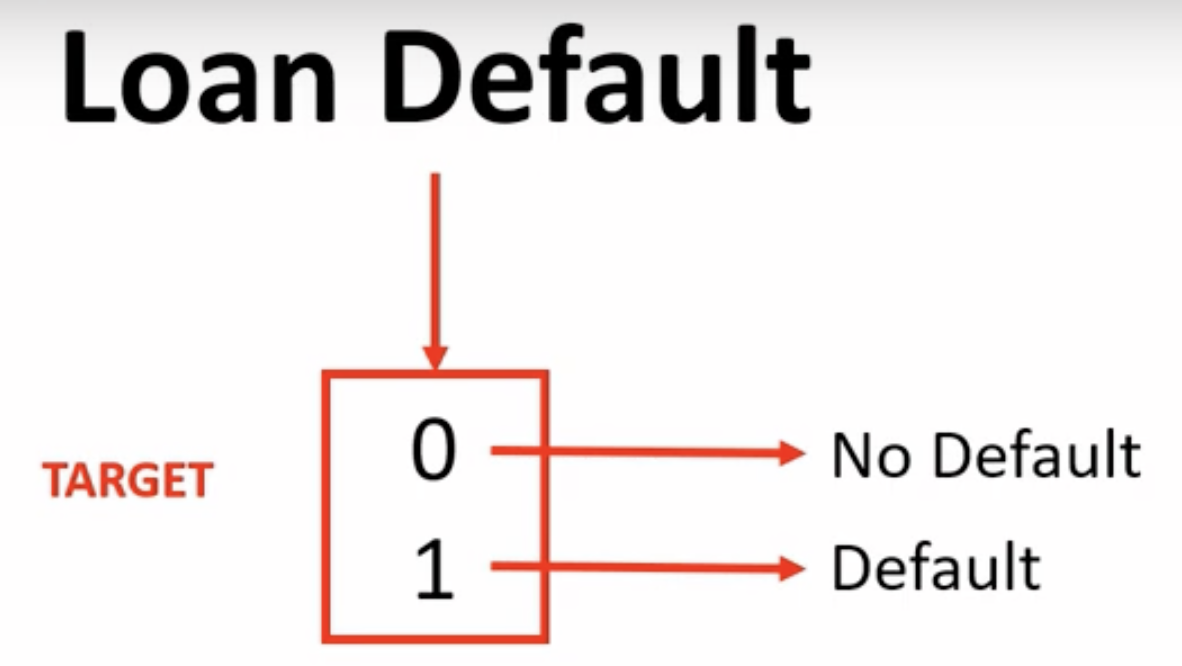

In [ ]:
# Revisión de los tipos de variables
# ==============================================================
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [ ]:
# Se seleccionan las variables (columnas) de tipo object
# ==============================================================
obj_var = app_score_col_rmvd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
# Se revisan los tipos de contratos al interior de la columnas NAME_CONTRACT_TYPE
# ==============================================================
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

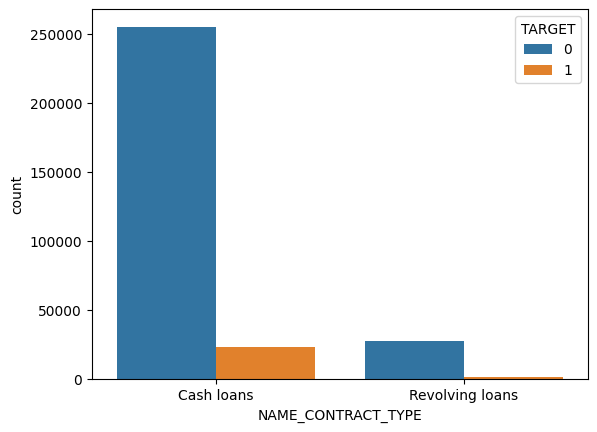

In [ ]:
# Se revisa por tipo de contrato el comportamiento de la variable objetivo (TARGET)
# ==============================================================
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [ ]:
# Calculamos el porcentaje de Default (incumplimiento)
# ==============================================================
data_pct = app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)
data_pct['PCT'] = data_pct['TARGET']*100
conteos = app_score_col_rmvd.groupby('NAME_CONTRACT_TYPE').size().reset_index(name='CONTEO')
data_pct = data_pct.merge(conteos, on='NAME_CONTRACT_TYPE')
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT,CONTEO
0,Cash loans,0.083,8.346,278232
1,Revolving loans,0.055,5.478,29279


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

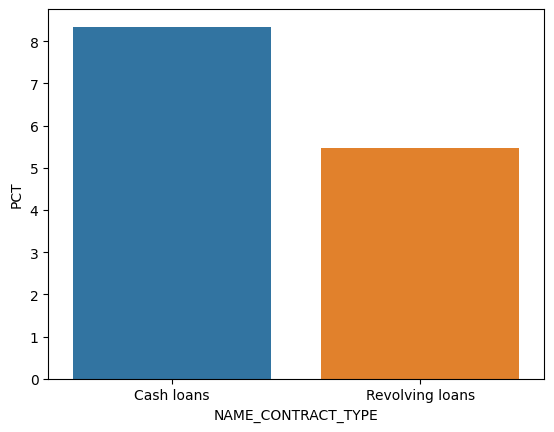

In [ ]:
# visualizamos el porcentaje de Default (incumplimiento) por tipo de contrato
# ==============================================================
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

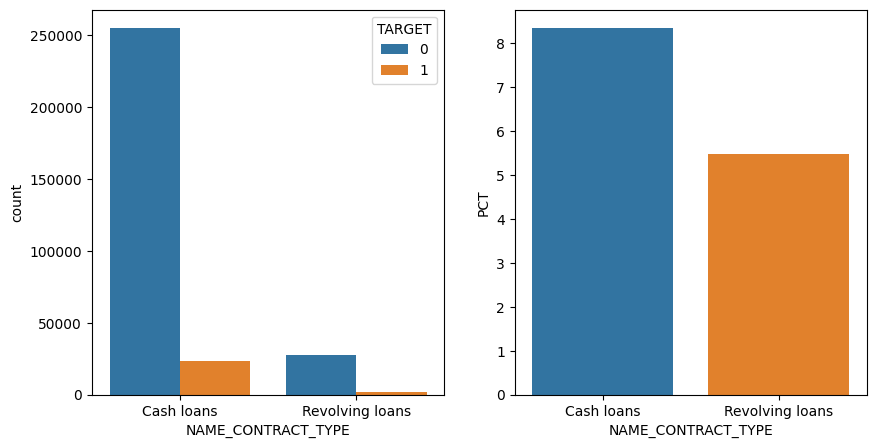

In [ ]:
# visualizamos el porcentaje de Default (incumplimiento) y los conteos
# ==============================================================
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

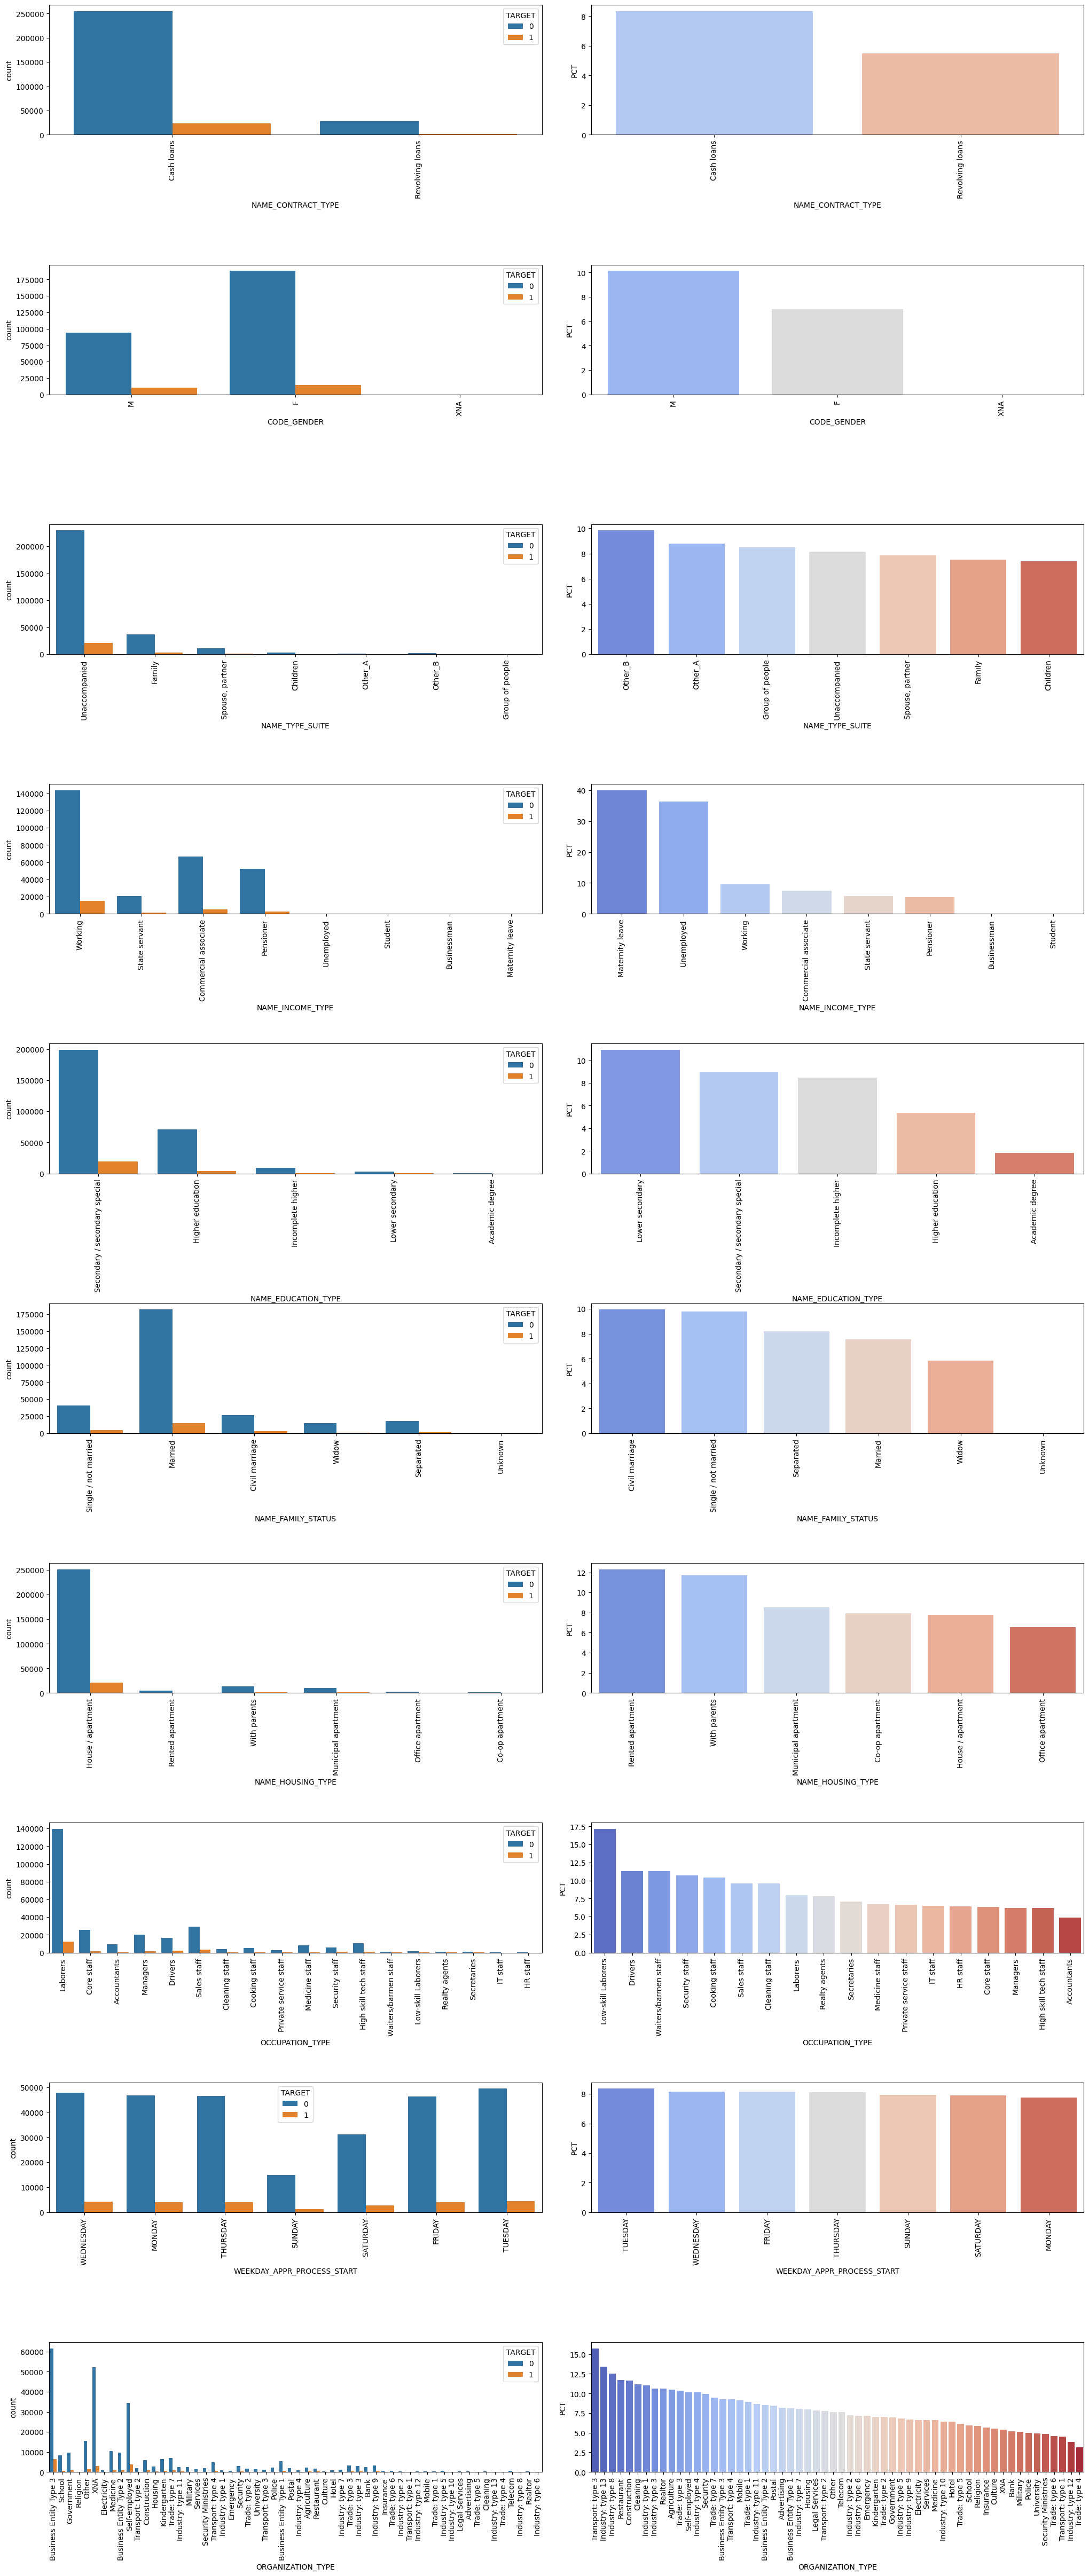

In [ ]:
# visualizamos para cada variable que hemos almacenado previamente en obj_var (variable tipo object)
# ==============================================================
obj_var
plt.figure(figsize=(25,60))

for i, var in enumerate(obj_var):

    data_pct = app_score_col_rmvd[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_score_col_rmvd,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

In [ ]:
# Revisamos las categorias al interior de la variable NAME_EDUCATION_TYPE
# ==============================================================
#app_score_col_rmvd['NAME_EDUCATION_TYPE'].unique()

In [ ]:
# Ahora seleccionamos las variables que son numericas (float64, int64)
# las almacenamos en una lista, hacemos lo mismo con los tipos (float64, int64, categrory)
# ==============================================================
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
#len(num_var)

In [ ]:
# creamos un df solo con las variables numericas y lo dividimos haciendo uso
# de la variable TARGER (defaulters: morosos, repayers: pagadores)
# ==============================================================
num_data = app_score_col_rmvd[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,0,270000.000,1293502.500,35698.500,1129500.000,0.004,16765,1188,...,0.000,1.000,0.000,828.000,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,0,67500.000,135000.000,6750.000,135000.000,0.010,19046,225,...,0.000,0.000,0.000,815.000,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,0,135000.000,312682.500,29686.500,297000.000,0.008,19005,3039,...,0.000,2.000,0.000,617.000,0.000,0.000,0.000,0.000,0.000,1.000
4,100007,0,0,121500.000,513000.000,21865.500,513000.000,0.029,19932,3038,...,0.000,0.000,0.000,1106.000,0.000,0.000,0.000,0.000,0.000,0.000
5,100008,0,0,99000.000,490495.500,27517.500,454500.000,0.036,16941,1588,...,0.000,0.000,0.000,2536.000,0.000,0.000,0.000,0.000,1.000,1.000


In [ ]:
# Se observa la correlación entre las variables (SK_ID_CURR	CNT_CHILDREN	AMT_INCOME_TOTAL) para los morosos
# ==============================================================
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000,-0.005,-0.010
CNT_CHILDREN,-0.005,1.000,0.005
AMT_INCOME_TOTAL,-0.010,0.005,1.000


In [ ]:
# Calculamos las correlaciones entre variables númericas y mostramos las 10 superiores (para Defaulter)
# ==============================================================
defaulter_corr = defaulters.corr()
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

<ipython-input-58-2b07c7a53d03>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998
202,AMT_GOODS_PRICE,AMT_CREDIT,0.983
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.957
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.848
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.779
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.752
169,AMT_ANNUITY,AMT_CREDIT,0.752
305,DAYS_EMPLOYED,DAYS_BIRTH,0.582


In [ ]:
# Calculamos las correlaciones entre variables númericas y mostramos las 10 superiores (para Repayers)
# ==============================================================
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

<ipython-input-59-3da17a5df08f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})


,var1,var2,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.999
202,AMT_GOODS_PRICE,AMT_CREDIT,0.987
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.862
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.776
169,AMT_ANNUITY,AMT_CREDIT,0.771
305,DAYS_EMPLOYED,DAYS_BIRTH,0.626


In [ ]:
# Visualizamos los una parte de los datos del dataframe num_data
# ==============================================================
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.000,406597.500,24700.500,351000.000,0.019,9461,637,...,2.000,2.000,2.000,1134.000,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,0,270000.000,1293502.500,35698.500,1129500.000,0.004,16765,1188,...,0.000,1.000,0.000,828.000,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,0,67500.000,135000.000,6750.000,135000.000,0.010,19046,225,...,0.000,0.000,0.000,815.000,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,0,135000.000,312682.500,29686.500,297000.000,0.008,19005,3039,...,0.000,2.000,0.000,617.000,0.000,0.000,0.000,0.000,0.000,1.000
4,100007,0,0,121500.000,513000.000,21865.500,513000.000,0.029,19932,3038,...,0.000,0.000,0.000,1106.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# Ahora nos enfocamos en las columnas AMT (Amount/monto/cantidad)
# ==============================================================
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

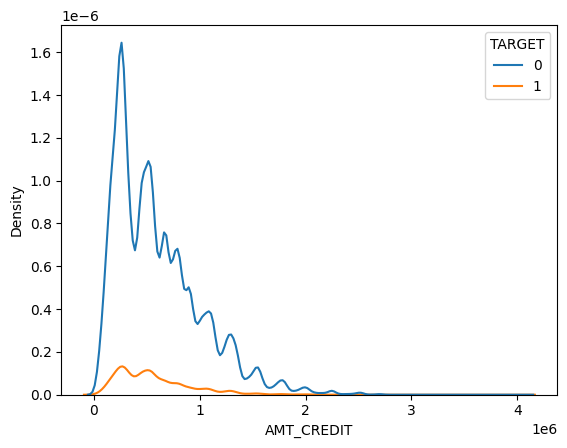

In [ ]:
# Visualizamos el comportamiento de la variable AMT_CREDIT segmentado por los tipos de TARGET
# Es importante tener en cuenta que: a densidad en un KDE no debe interpretarse como una probabilidad en un punto
#específico, sino como una densidad de probabilidad en una región dada.
#También, la área bajo la curva de KDE sumará 1, como una función de densidad de probabilidad válida.
# ==============================================================
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

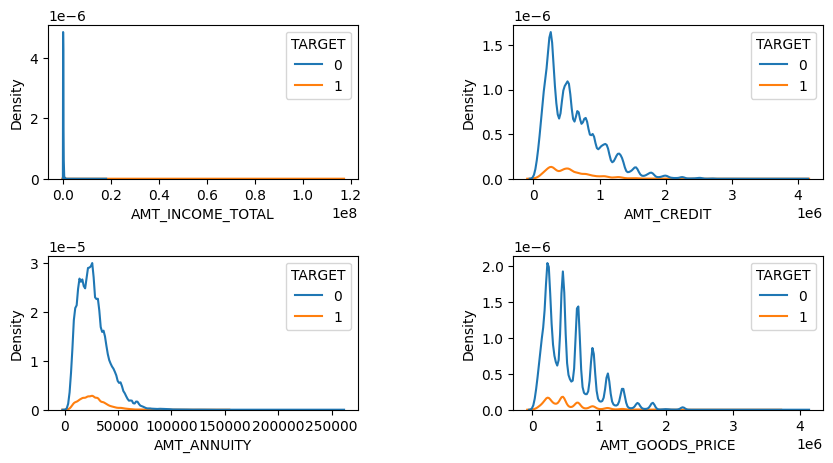

In [ ]:
# Visualizamos el comportamiento de las variables "númericas"
# ==============================================================
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
#num_data.head()

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

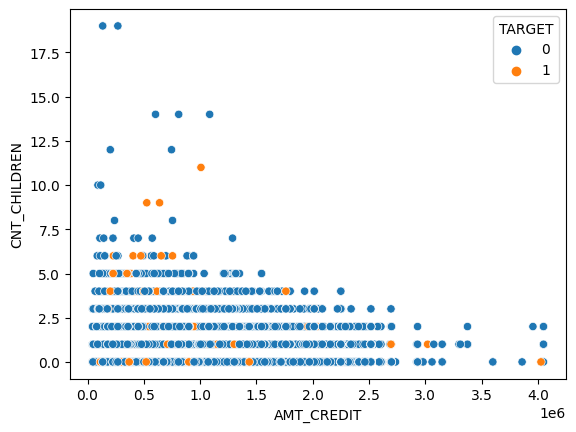

In [ ]:
# Visualizamos el de las variables "AMT_CREDIT" y "CNT_CHILDREN"
# ==============================================================
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

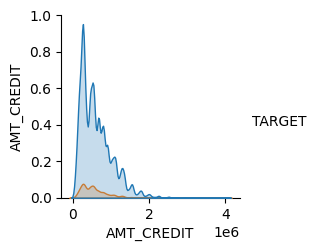

In [ ]:
# Visualizamos el de las variables "AMT_CREDIT" y "TARGET" (podemos cambiar de variable para ir comparado)
# ==============================================================
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
#['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']

amt_single_var = ['AMT_CREDIT', 'TARGET']
sns.pairplot(data=num_data[amt_single_var],hue='TARGET')

## PREV_APP

In [ ]:
# Ahora hacemos un revisión del datrame prev_app
# revisamos las columnas que contienen al menos un 40% de valores nulos
# ==============================================================
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [ ]:
#
# ==============================================================
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [ ]:
# ==============================================================
len(prev_app.columns)

37

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)
len(prev_app_nva_col_rmvd.columns)

22

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,17145.000,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,607500.000,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,112500.000,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,450000.000,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,337500.000,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high


In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE          23.082
AMT_ANNUITY              22.287
CNT_PAYMENT              22.286
PRODUCT_COMBINATION       0.021
AMT_CREDIT                0.000
NAME_GOODS_CATEGORY       0.000
NAME_YIELD_GROUP          0.000
NAME_SELLER_INDUSTRY      0.000
SELLERPLACE_AREA          0.000
CHANNEL_TYPE              0.000
NAME_PRODUCT_TYPE         0.000
NAME_PORTFOLIO            0.000
SK_ID_PREV                0.000
NAME_CLIENT_TYPE          0.000
SK_ID_CURR                0.000
NAME_PAYMENT_TYPE         0.000
DAYS_DECISION             0.000
NAME_CONTRACT_STATUS      0.000
NAME_CASH_LOAN_PURPOSE    0.000
AMT_APPLICATION           0.000
NAME_CONTRACT_TYPE        0.000
CODE_REJECT_REASON        0.000
dtype: float64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean     227847.279
median   112320.000
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])


In [ ]:
# ==============================================================
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

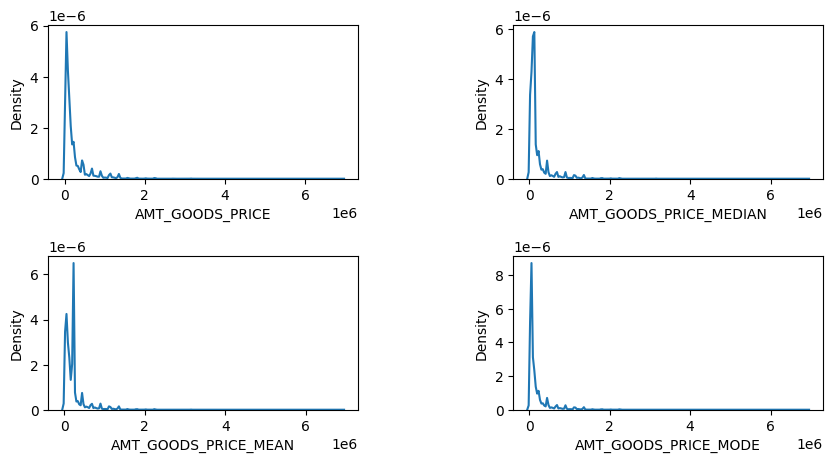

In [ ]:
# ==============================================================
plt.figure(figsize=(10,5))

for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean      15955.121
median    11250.000
max      418058.145
Name: AMT_ANNUITY, dtype: float64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())


In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean     16.054
median   12.000
max      84.000
Name: CNT_PAYMENT, dtype: float64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [ ]:
# ==============================================================
len(prev_app_nva_col_rmvd.columns)

22

In [ ]:
# ==============================================================
prev_app_nva_col_rmvd.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,17145.000,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,607500.000,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,112500.000,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,450000.000,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,337500.000,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high


In [ ]:
# ==============================================================
merged_df = pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.000,1293502.500,35698.500,1129500.000,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.000,1293502.500,35698.500,1129500.000,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.000,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.000,1293502.500,35698.500,1129500.000,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.000,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.000,middle,POS mobile without interest


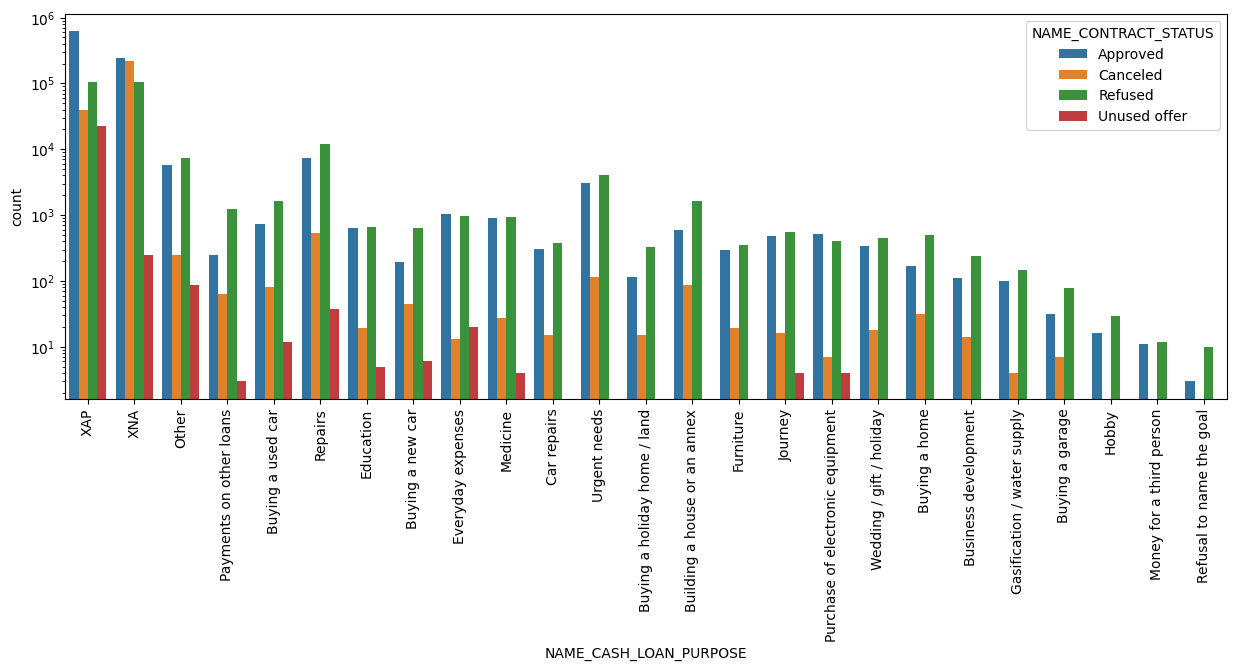

In [ ]:
# ==============================================================
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

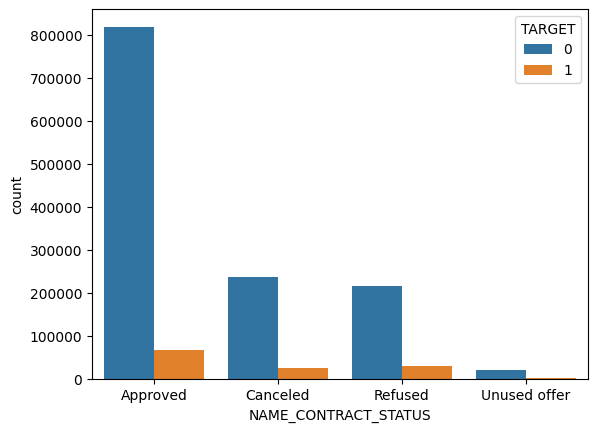

In [ ]:
# ==============================================================
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [ ]:
# ==============================================================
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.410
1,Approved,1,67243,886099,7.590
2,Canceled,0,235641,259441,90.830
3,Canceled,1,23800,259441,9.170
4,Refused,0,215952,245390,88.000
5,Refused,1,29438,245390,12.000
6,Unused offer,0,20892,22771,91.750
7,Unused offer,1,1879,22771,8.250


<ipython-input-97-182e47c4a2a9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

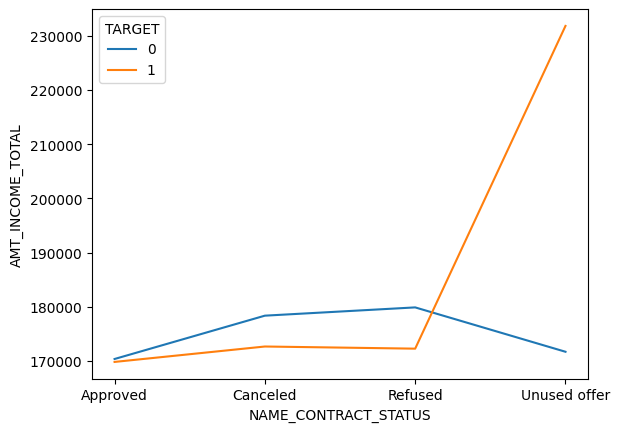

In [ ]:
# ==============================================================
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [ ]:
# ==============================================================
len(merged_df.columns)

70

Todo el análisis

La mayoría de los clientes han tomado un préstamo en efectivo. Los clientes que han tomado préstamos en efectivo tienen menos probabilidades de incumplir.

- CODE_GENDER:

La mayoría de los préstamos han sido tomados por mujeres. La tasa de incumplimiento para las mujeres es solo del ~7% lo cual es más seguro y menor que el de los hombres.

- NAME_TYPE_SUITE:

Las personas no acompañadas han tomado la mayoría de los préstamos y la tasa de incumplimiento es del ~8.5% lo cual aún es aceptable.

- NAME_INCOME_TYPE:

Los segmentos más seguros son los trabajadores, los asociados comerciales y los pensionados.

- NAME_EDUCATION_TYPE:

La educación superior es el segmento más seguro para dar el préstamo con una tasa de incumplimiento de menos del 5%.

- NAME_FAMILY_STATUS:

Las personas casadas son seguras para enfocarse, la tasa de incumplimiento es del 8%.

- NAME_HOUSING_TYPE:

Las personas que tienen casa/apartamento son seguras para darles el préstamo con una tasa de incumplimiento del ~8%.

- OCCUPATION_TYPE:

Los trabajadores con baja calificación y los conductores son los que más incumplen. Los contadores incumplen menos. El personal clave, los gerentes y los trabajadores son más seguros para enfocarse con una tasa de incumplimiento del <= 7.5 al 10%.

- ORGANIZATION_TYPE:

Transporte tipo 3 es el que más incumple. Otros, Entidad Empresarial Tipo 3, Autónomos están bien para proceder con una tasa de incumplimiento alrededor del 10%.

- Análisis de variables numéricas univariadas:

La mayoría de los préstamos se otorgaron por el precio de los bienes en un rango de 0 a 1 millón. La mayoría de los préstamos se otorgaron por un monto de crédito de 0 a 1 millón. La mayoría de los clientes están pagando una anualidad de 0 a 50 mil. En su mayoría, los clientes tienen ingresos entre 0 a 1 millón.

- Análisis bivariado:

AMT_CREDIT y AMT_GOODS_PRICE están correlacionados linealmente, si AMT_CREDIT aumenta, los incumplidores disminuyen. Las personas con ingresos menores o iguales a 1 millón, son más propensas a solicitar préstamos, de los cuales quienes solicitan un préstamo de menos de 1.5 millones, podrían resultar ser incumplidores. Podemos enfocarnos en ingresos por debajo de 1 millón y montos de préstamo mayores a 1.5 millones. Las personas que tienen entre 1 a menos de 5 hijos son más seguras para otorgar el préstamo. Las personas que pueden pagar una anualidad de 100K son más propensas a obtener el préstamo y eso es hasta menos de 2 millones (segmento más seguro).

- Análisis en datos fusionados:

Para el propósito de reparación, los clientes habían solicitado principalmente antes y el mismo propósito tiene la mayoría de las cancelaciones. La mayoría de las solicitudes que fueron previas, ya sea canceladas o rechazadas, el 80-90% de ellas son reembolsadas en los datos actuales. Las ofertas que no se utilizaron antes, ahora tienen el mayor número de incumplidores a pesar de tener clientes de banda de ingresos altos.

- Conclusión/Percepciones finales:

El banco debería enfocarse en los clientes que tienen bajos ingresos, es decir, por debajo de 1 millón. Trabajando en Otros, Entidad Empresarial Tipo 3, tipo de organización Autónomo. Trabajando como Contadores, Personal clave, Gerentes y Trabajadores. Que tienen casa/apartamento y están casados y tienen no más de 5 hijos. Altamente educados. Preferiblemente mujeres. Las personas no acompañadas pueden ser más seguras - la tasa de incumplimiento es del ~8.5%.

- Segmento de monto recomendado:

El monto del crédito no debería ser más de 1 millón. La anualidad podría ser de 50K (dependiendo de la elegibilidad). El rango de ingresos podría ser por debajo de 1 millón.

El 80-90% de los clientes que fueron previamente cancelados/rechazados, son pagadores. El banco puede hacer el análisis y considerar otorgar préstamos a estos segmentos.

- Precauciones:

La organización Transporte tipo 3 debería ser evitada. Los trabajadores poco calificados y los conductores deberían ser evitados. Las ofertas previamente no utilizadas y los clientes de alta renta deberían ser evitados.